<h1 align ='center'> Machine Learning, Airbnb Data Modeling <h1>
<h2 align ='left'> Authors: <h2>
<h3 align ='left'>Juan Diego M. Flores<h3>
<h3 align ='left'>Julio Manuel P. Lugo<h3>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from nltk.probability import FreqDist
import seaborn as sns
import time

%matplotlib inline

## Dataset Exploration

### Quick view

This data set consists on 48864 entries, There are also 106 variables out of which 105 are feature variables and one (price) is a response variable. 

In [39]:
data = pd.read_csv('./listings.csv', low_memory=False)

data.shape

(48864, 106)

In [40]:
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20190806030549,2019-08-07,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.39
1,3647,https://www.airbnb.com/rooms/3647,20190806030549,2019-08-06,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN


if we list features:


In [41]:
print(sorted(data.columns))

['access', 'accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee', 'country', 'country_code', 'description', 'experiences_offered', 'extra_people', 'first_review', 'guests_included', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'house_rules', 'id', 'instant_bookable', 'interaction', 'is_business_travel_

## Quick Analisis of the features. 

Here we have a list of the most important features divided in numerical an categorical. 


### Numerical Features

- *price:* the price per night; response variable, the most important variable
- *accommodates:* the number of guests the rental can accommodate
- *bedrooms:* number of bedrooms included in the rental
- *bathrooms:* number of bathrooms included in the rental
- *beds:* number of beds included in the rental
- *minimum_nights:* minimum number of nights a guest can stay for the rental
- *maximum_nights:* maximum number of nights a guest can stay for the rental
- *number_of_reviews:* number of reviews that previous guests have left
- *security_deposit:* required based on property type or length of stay
- *cleaning_fee:* cleaning costs
- *square_feet:* amount of space
- *guests_included:* number of guests booker want to include
- *extra_people:* cost of additional person per night
- *latitude:* locational coordinate; used by Charlie for geospatial modeling 
- *longitude:* locational coordinate; used by Charlie for geospatial modeling

### Categorical Features

- *calendar_updated:* property listing date; will be discarded later
- *property_type:* house, townhouse, apartment, condo, hostel, cabin, etc.
- *room_type:* entire home/apt, private room or shared room
- *bed_type:* real bed, pull-out sofa, futon, airbed, and couch.
- *neighbourhood_cleansed:* neighborhood e.g. Midtown, Harlem, Murray Hill, etc.
- *cancellation_policy:* 6 categories: super_strict_60, super_strict_30, strict_14_with_grace_period, strict, moderate, and flexible.
- *amenities:* Wifi, TV, kitchen, smoke detector, air conditioning, etc.1 
- *instant_bookable:* This is a feature that hosts can select for their listing which removes the approval process. Instead of being notified that someone is interested in your place and then giving them the thumbs up/down – guests can just choose their dates, book, and discuss check-in plans later.
- *host_is_superhost:* describes highly rated and relaible hosts (true/false).
- *host_has_profile_pic:* whether or not hosts has pictures on their profile (true/false)
- *host_identity_verified:* whether or not the the identity of the host has been verified (true/false).
- *require_guest_profile_picture:* important feature since people tend to be hesistant about releasing their pictures.

## Droping unnecessary variables

In [42]:
keeped_features = [
        'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'host_id',
        'host_since',
        'host_is_superhost', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'latitude',
        'longitude', 'is_location_exact', 'property_type', 'room_type',
        'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'amenities', 'security_deposit', 'cleaning_fee',
        'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
        'minimum_minimum_nights', 'maximum_minimum_nights',
        'minimum_maximum_nights', 'maximum_maximum_nights',
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
        'has_availability', 'availability_30', 'availability_60',
        'availability_90', 'availability_365', 'calendar_last_scraped',
        'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
        'require_guest_profile_picture', 'require_guest_phone_verification',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms',
        'number_of_reviews','price'
    ]

droped_features = [i for i in data.columns if i not in keeped_features]

data_filtered = data.copy()
data_filtered.drop(droped_features, axis=1, inplace=True)
data = data_filtered.copy()

In [43]:
data.shape

(48864, 54)

## Casting variable values to correct type

The 'price', 'security deposit', 'cleaning fee', 'extra_people' columns carry the dollar sign \\$; this must be removed. Also, the amenities column contain unwanted characters. We will also replace "Cable TV" in the amenities with "TV".

In [44]:
def clean_dataframe(df):
    
    for i in ['price','cleaning_fee','security_deposit', 'extra_people']:
        df[i]=df[i].str.replace('$','').str.replace(',', '').astype(float)
    
    df['amenities']=df['amenities'].str.replace('{}','').str.replace('{ }','')
    
    df['amenities']=df['amenities'].str.replace(
    '$','').str.replace('{','').str.replace('}','').str.replace(
    '"','').str.replace(' toilet','toilet').str.replace('Cable TV','TV')

    df.replace('', np.nan, inplace=True)
    
    return df

data=clean_dataframe(data)
data.shape


(48864, 54)

our data has been casted

In [45]:
data[['amenities', 'price','cleaning_fee','security_deposit', 'extra_people']]

,amenities,price,cleaning_fee,security_deposit,extra_people
0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",225.0,100.0,350.0,0.0
1,"TV,Internet,Wifi,Air conditioning,Kitchen,Buzz...",150.0,75.0,200.0,20.0
2,"TV,TV,Internet,Wifi,Air conditioning,Kitchen,P...",89.0,NaN,500.0,0.0
3,"Internet,Wifi,Air conditioning,Kitchen,Elevato...",80.0,80.0,100.0,20.0
4,"TV,TV,Internet,Wifi,Kitchen,Buzzer/wireless in...",200.0,125.0,300.0,100.0
...,...,...,...,...,...
48859,"TV,Wifi,Air conditioning,Kitchen,Pets allowed,...",65.0,NaN,NaN,0.0
48860,"Wifi,Kitchen,Elevator,Heating,Washer,Dryer,Smo...",60.0,NaN,NaN,0.0
48861,"TV,TV,Wifi,Air conditioning,Kitchen,Paid parki...",239.0,0.0,0.0,20.0
48862,"Wifi,Air conditioning,Kitchen,Elevator,Heating...",75.0,40.0,300.0,0.0


## Describe Numerical Features

In [46]:
def identify_set(df):
    categorical = df.columns[df.dtypes == 'object']
    numerical = df.columns[df.dtypes != 'object']
    return(numerical, categorical)

numerical_set, categorical_set = identify_set(data)

In [47]:
data[numerical_set].describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48864.0,6.943161e+07,8.058217e+07,2438.00000,8.048590e+06,3.168654e+07,1.096553e+08,2.830244e+08
host_listings_count,48846.0,1.483227e+01,8.824539e+01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.465000e+03
host_total_listings_count,48846.0,1.483227e+01,8.824539e+01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.465000e+03
latitude,48864.0,4.072866e+01,5.479435e-02,40.49979,4.068980e+01,4.072288e+01,4.076297e+01,4.091240e+01
longitude,48864.0,-7.395185e+01,4.643992e-02,-74.24442,-7.398295e+01,-7.395551e+01,-7.393563e+01,-7.371299e+01
accommodates,48864.0,2.846206e+00,1.882121e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,2.600000e+01
bathrooms,48808.0,1.144187e+00,4.319757e-01,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.550000e+01
bedrooms,48837.0,1.173455e+00,7.462148e-01,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01
beds,48822.0,1.548073e+00,1.112344e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01
price,48864.0,1.514532e+02,2.365855e+02,0.00000,6.900000e+01,1.050000e+02,1.750000e+02,1.000000e+04


## Analize missing values

As we can see in the dataframe there are some variables with missing values if we evaluate missing data:

In [48]:
def identify(i, numerical_set):
    if i in numerical_set: 
        return('numerical')
    else:
        return('categorical')
    
def show_missing_data(df, numerical_set):
    df_sorted = df.isnull().sum()
    df_sorted.sort_values(axis=0,ascending=False,inplace=True)
    number_of_rows=len(df)
    missing_types=[identify(i, numerical_set) for i in df_sorted.index]
    headers=[tuple(df[i].head(n=5)) for i in df_sorted.index]
    tmp1 = pd.DataFrame({'Feature':df_sorted.index, 
                         'Missing values':df_sorted.values})
    tmp1['Feature type']=pd.Series(missing_types, index=tmp1.index)
    tmp1['Percentage missing']=pd.Series(df_sorted.values*100/number_of_rows, index=tmp1.index)
    tmp1['First 5 values']=pd.Series(headers, index=tmp1.index)
    return tmp1 

In [49]:
tmp = show_missing_data(data, numerical_set)
tmp[tmp['Percentage missing'] > 0.0]

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,security_deposit,17290,numerical,35.383923,"(350.0, 200.0, 500.0, 100.0, 300.0)"
1,cleaning_fee,10584,numerical,21.660118,"(100.0, 75.0, nan, 80.0, 125.0)"
2,zipcode,515,categorical,1.053946,"(10018, 10027, 11238, 10029, 10016)"
3,amenities,152,categorical,0.311067,"(TV,Wifi,Air conditioning,Kitchen,Paid parking..."
4,city,62,categorical,0.126883,"(New York, New York, Brooklyn, New York, New Y..."
5,bathrooms,56,numerical,0.114604,"(1.0, 1.0, 1.0, 1.0, 1.0)"
6,beds,42,numerical,0.085953,"(1.0, 1.0, 4.0, 1.0, 1.0)"
7,bedrooms,27,numerical,0.055255,"(0.0, 1.0, 1.0, nan, 1.0)"
8,host_since,18,categorical,0.036837,"(2008-09-09, 2008-11-25, 2008-12-07, 2009-01-2..."
9,host_is_superhost,18,categorical,0.036837,"(f, f, f, f, f)"


## Process missing values

- missing values for 'security_deposit' and 'cleaning_fee' will be replaced with average values.
- rows with missing values on 'zipcode','amenities', 'cancellation_policy', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified' and 'city' will be dropped. 
- column 'host_since' will be dropped
- missing values on 'beds','bathrooms','bedrooms' and 'state' will be replaced with their respective modal values

In [50]:
def drop_features_and_impute_values(df):
    
    df['security_deposit'].fillna(df['security_deposit'].mean(),inplace=True)
    df['cleaning_fee'].fillna(df['cleaning_fee'].mean(),inplace=True)
    
    df.dropna(subset=['zipcode','amenities',
                      'cancellation_policy',
                      'host_is_superhost',
                      'host_listings_count',
                      'host_total_listings_count',
                      'host_has_profile_pic',
                      'host_identity_verified',
                      'city'
                     ],inplace=True)
    
    df.drop('host_since',axis=1,inplace=True)
    
    ftodrop=['beds','bathrooms','bedrooms','state']
    
    for i in ftodrop:
        df[i].fillna(df[i].mode()[0], inplace=True)
        
    df.reset_index(drop=True,inplace=True)

In [51]:
drop_features_and_impute_values(data)

In [52]:
data.shape

(48126, 53)

## Check if missing data has been processed

In [53]:
print(data.shape)
print(data.isnull().values.any())

(48126, 53)
False


## Price per property type

This variable tells what kind of property does the post have:

In [54]:
list(FreqDist(data['property_type'].tolist()).keys()).__len__()

37

it means there are 37 unique properties, if we plot the frencuenciy of each property type we have:

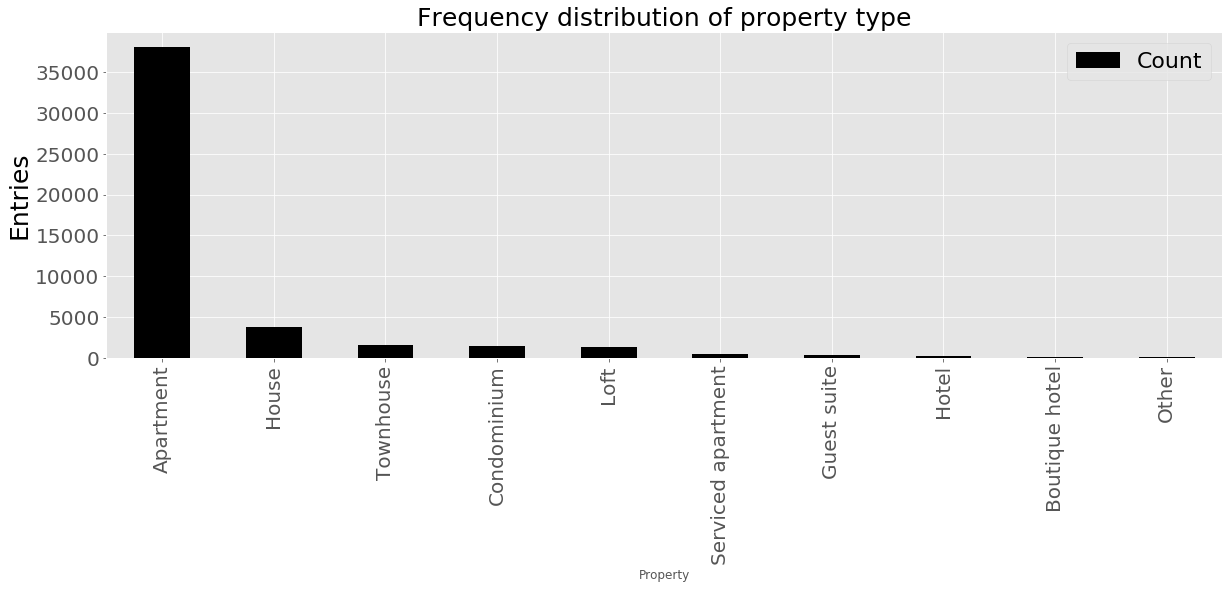

In [55]:
def plot_property_type_frecuencies(df):
    all_properties=df['property_type'].tolist()
    fdist = FreqDist(all_properties)
    prop = pd.DataFrame({'Property': list(fdist.keys()),'Count': list(fdist.values())})
    prop = prop.nlargest(columns="Count", n = 10)
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    prop.plot(x='Property',y='Count',kind='bar',color='black')
    plt.ylabel('Entries',fontsize=25,color='black')
    plt.title('Frequency distribution of property type',fontsize=25,color='black')
    plt.tick_params(labelsize=20)
    plt.xticks(rotation='vertical')
    plt.legend(fontsize=22)
    plt.show()

plot_property_type_frecuencies(data)

As the plot shows there are more apartments on the entries. Now we are intereted on plotting average price and median price per property type

In [56]:
def plot_average_price(feature, label, df, title, nlength):
    sort_price = df.groupby(feature)['price'].mean().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'average price'}, inplace=True)
    d = sort_price.copy()
    d = d.nlargest(columns="average price", n =min(len(d),nlength))

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    d.plot(x=label, y='average price', kind="bar",color='black')
    plt.ylabel('Average price',fontsize=25,color='black')
    plt.title(title,fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=20)
    plt.xticks(rotation='vertical')
    plt.show()

def plot_median_price(feature, label, df, title, nlength):
    sort_price = df.groupby(feature)['price'].median().sort_values(ascending=False)
    sort_price = sort_price.to_frame().reset_index()
    sort_price.rename(columns ={feature:label,
                           'price':'median price'}, inplace=True)
    d = sort_price.copy()
    d = d.nlargest(columns="median price", n =min(len(d),nlength))
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    d.plot(x=label, y='median price', kind="bar",color='black')
    plt.ylabel('Median price',fontsize=25,color='black')
    plt.title(title, fontsize=25,color='black')
    plt.legend(fontsize=20)
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()


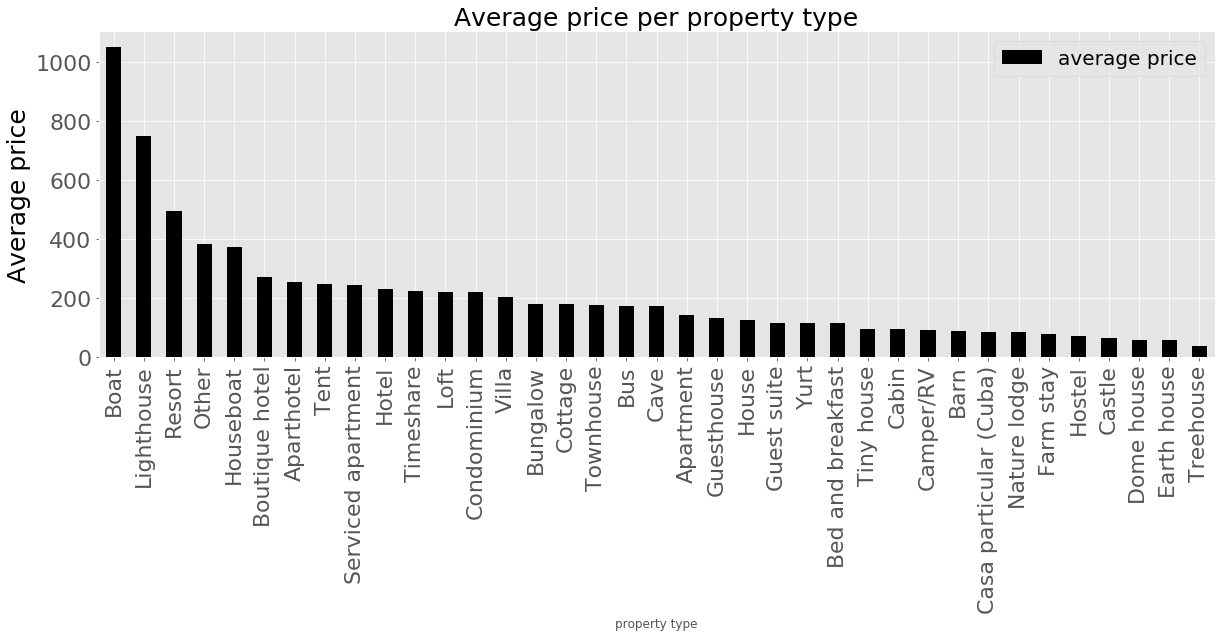

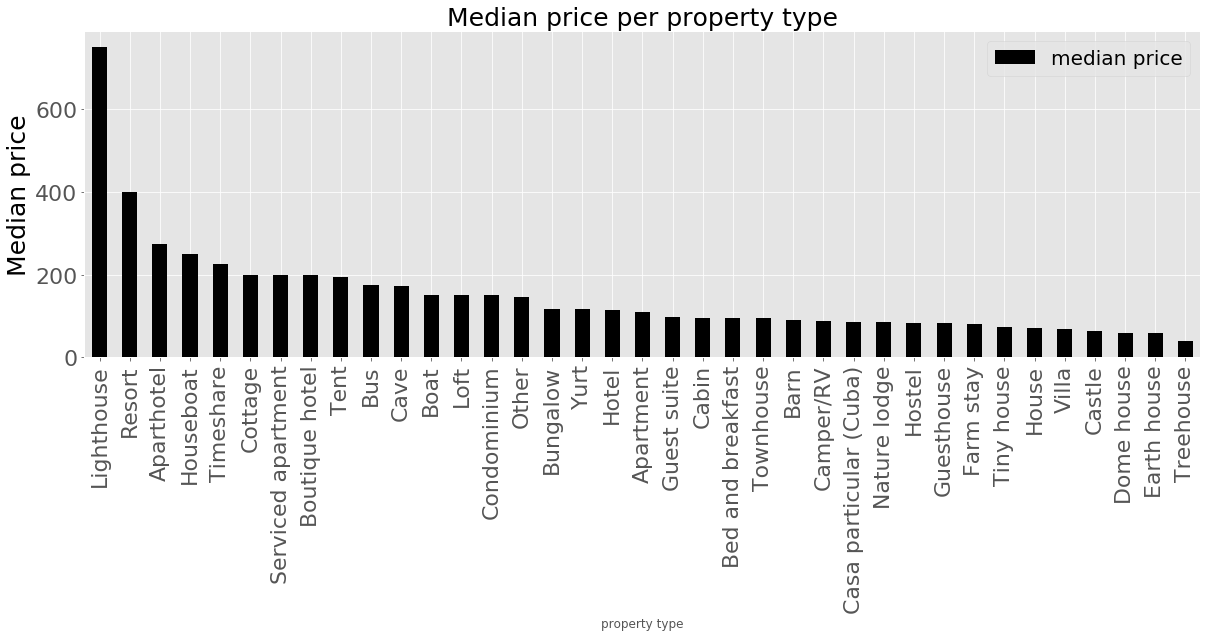

In [57]:
plot_average_price('property_type','property type', data, 'Average price per property type', 37)
plot_median_price('property_type','property type', data, 'Median price per property type', 37)

according with plots lighthouses has biggest average price 

## Price per neightboorhood

this variable tells which neightboorhod is the property located

In [58]:
list(FreqDist(data['neighbourhood_cleansed'].tolist()).keys()).__len__()

222

there are 221 different neighbourhoods, we will see price distribution for the most importat neighbourhoods. First lets look at the frecuencies

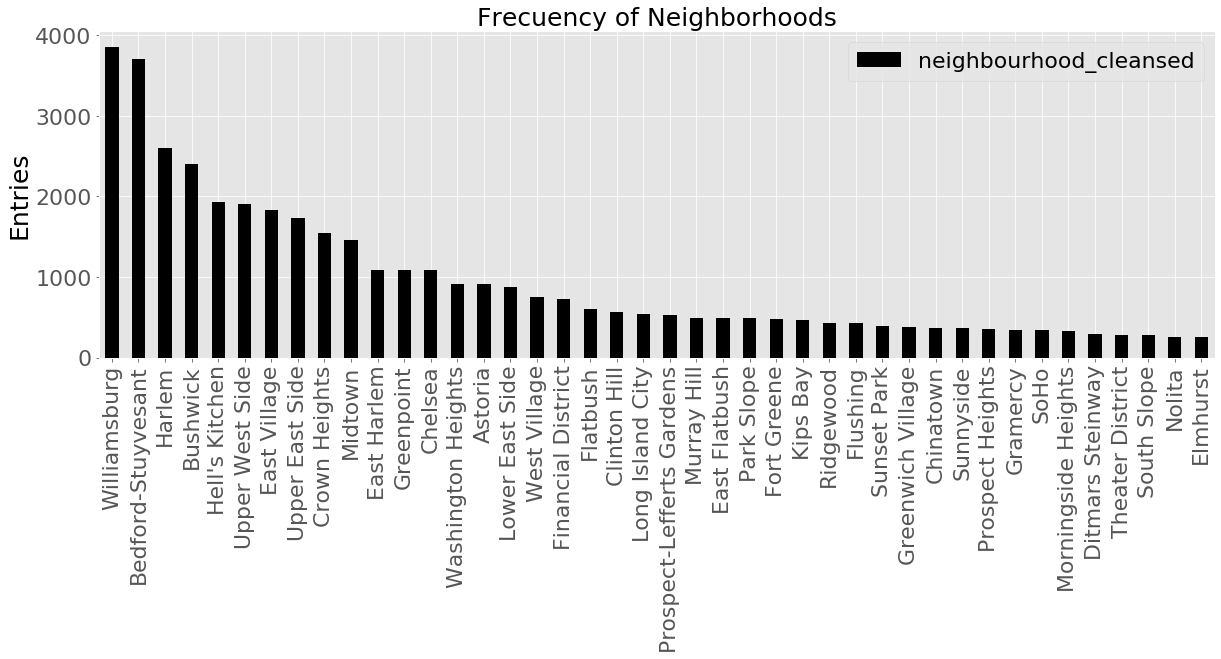

In [59]:
def neighborhoods_frecuency(df, nthreshhold):
    listings_per_nbhood = df['neighbourhood_cleansed'].value_counts()
    acceptable_nbhood = listings_per_nbhood[listings_per_nbhood >=nthreshhold].index
    acceptable_listings = df[df['neighbourhood_cleansed'].isin(acceptable_nbhood)]
    listings_per_nbhood = acceptable_listings['neighbourhood_cleansed'].value_counts()    
    listings_per_nbhood.to_frame()
    listings_per_nbhood.columns = ['neighborhood','count']
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    listings_per_nbhood.plot(x="neighborhood", y='count', kind="bar", color = 'black')
    plt.ylabel('Entries',fontsize=25,color='black')
    plt.title('Frecuency of Neighborhoods',fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=22)
    plt.show()

neighborhoods_frecuency(data, 250)

there are more entries located at Bedford-Stuyvesant. Now lets take a look at the average and median per neighbourhood

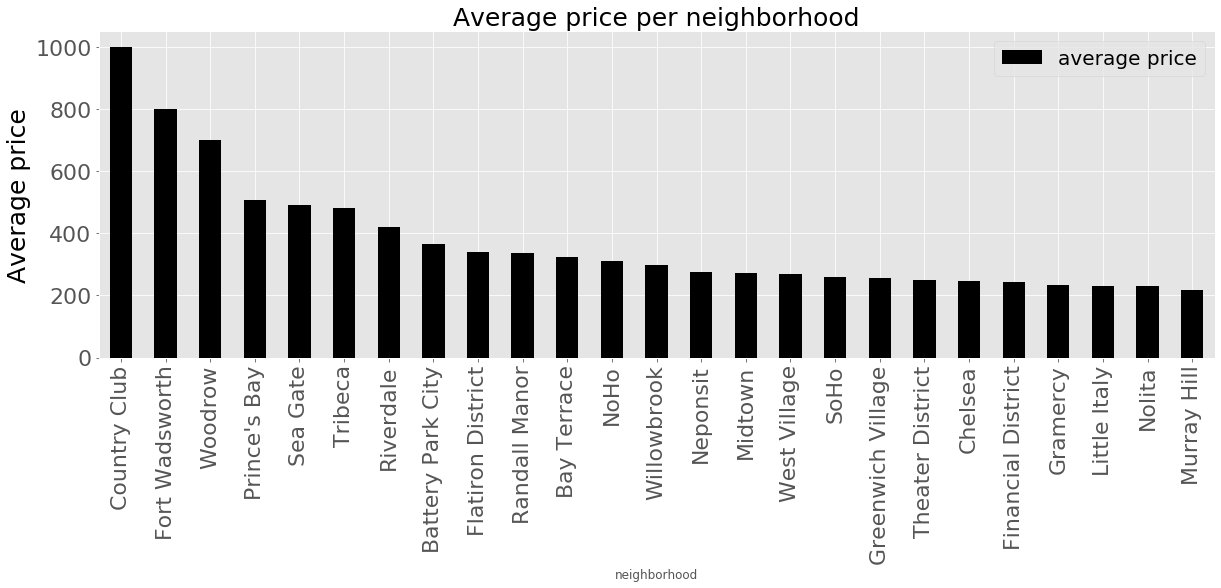

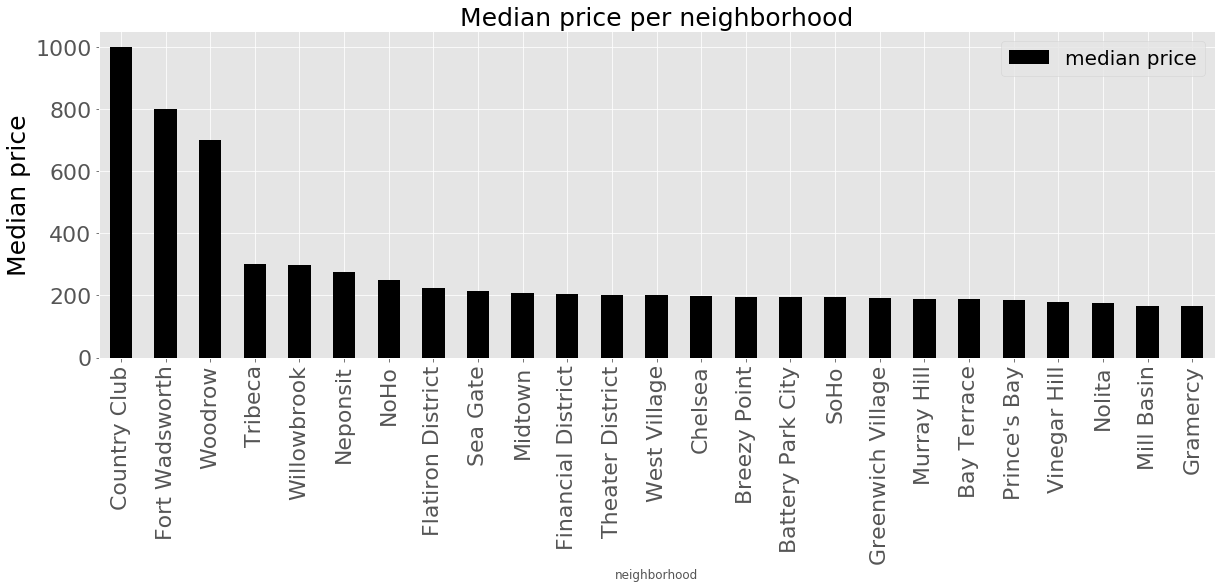

In [60]:
plot_average_price('neighbourhood_cleansed','neighborhood', data, 'Average price per neighborhood', 25)
plot_median_price('neighbourhood_cleansed','neighborhood', data, 'Median price per neighborhood', 25)

We can see how Country Club is the most expensive neighborhood

## Prices variation respect to room type

Price of an entry can vary considerably according to room type, it is described in the plot bellow.

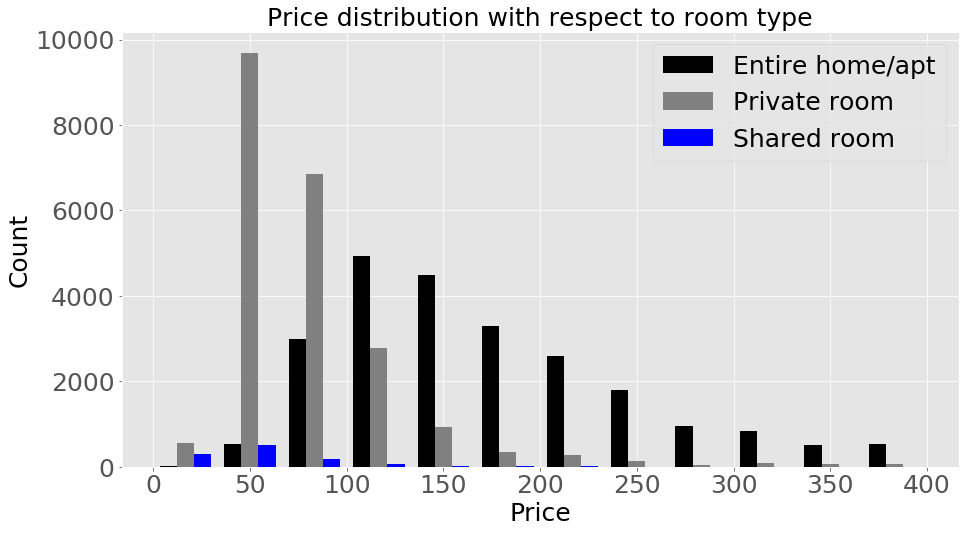

In [61]:
def room_type_count_vs_price(df,title):
    df2 = df.pivot(columns='room_type',values='price')
    x1=list(df2[df2.columns[0]])
    x2=list(df2[df2.columns[1]])
    x3=list(df2[df2.columns[2]])
    plt.rc('legend',**{'fontsize':25})
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=25)
    plt.ylabel("Count",fontsize=25,color='black')
    plt.xlabel("Price",fontsize=25,color='black')
    plt.title(title,fontsize=25,color='black')
    plt.tick_params(labelsize=25)
    n_bins=12
    colors = ['black', 'grey', 'blue']
    labels=[df2.columns[0],df2.columns[1],df2.columns[2]]
    plt.hist([x1, x2, x3], n_bins, histtype='bar', 
             color=colors, range=[0,400],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

data_frame = data
room_type_count_vs_price(data_frame, 'Price distribution with respect to room type')

## Prices variation respect to number of beds

Price of an entry can vary considerably according to number of beds, it is described in the plot bellow.

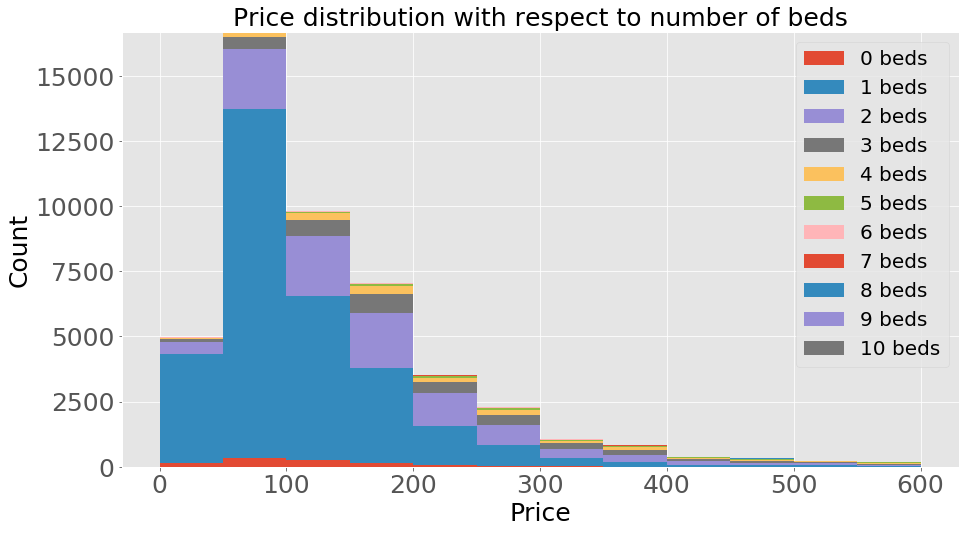

In [62]:
def number_of_beds_count_vs_price(df,title):
    df2 = df.pivot(columns='beds',values='price')
    x = [list(df2[df2.columns[i]]) for i in range(len(df2.columns)) if i <= 10]
    labels = [str(int(df2.columns[i]))+' beds' for i in range(len(df2.columns))]
    plt.rc('legend', **{'fontsize':20})
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=14)
    plt.ylabel("Count",fontsize=25,color='black')
    plt.xlabel("Price",fontsize=25,color='black')
    plt.title(title,fontsize=25,color='black')
    plt.tick_params(labelsize=25)
    n_bins=12
    plt.hist(x, n_bins, stacked=True,range=[0,600],label=labels)        
    plt.legend(loc="upper right")
    plt.show()

number_of_beds_count_vs_price(data_frame, 'Price distribution with respect to number of beds')

## Prices variation respect to amenities

Every entry has a certain set of amenities for example TV, wifi, etc; there are a total of 128 unique amenities, we are interested on how frecuent an amenity is, median and average price with repect to each amenity.

Lets find out all unique amenities.

In [63]:
def get_amenities(df):
    all_amenities=df['amenities'].tolist()
    all_amenities=','.join(map(str, all_amenities)).split(',')
    unique_amenities=set(all_amenities)
    unique_amenities=list(unique_amenities)    
    return (all_amenities, unique_amenities)

all_amenities, unique_amenities = get_amenities(data)
print('Number of amenities:')
print(len(unique_amenities))
print('First five amenities:')
print(unique_amenities[:5])

Number of amenities:
128
First five amenities:
['Other pet(s)', 'Fire extinguisher', 'Wide entryway', 'Patio or balcony', 'First aid kit']


there are 128 unique amenities now we are interested on how frecuent an amenity is.

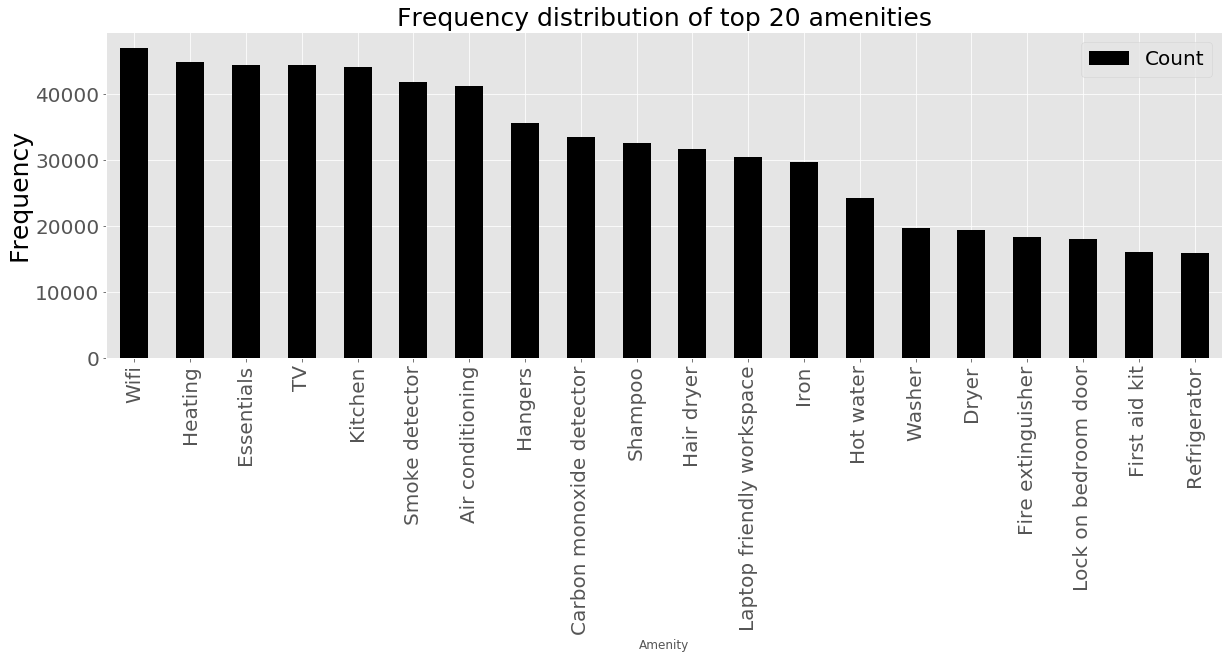

In [64]:
def amenities_frequency(amenities):
    fdist = FreqDist(amenities)
    d = pd.DataFrame({'Amenity': list(fdist.keys()),'Count': list(fdist.values())})
    d2=d.copy()
    d2 = d2.nlargest(columns="Count", n = 20)
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    d2.plot(x='Amenity',y='Count',kind='bar',color='black')
    plt.ylabel('Frequency',fontsize=25,color='black')
    plt.title('Frequency distribution of top 20 amenities',fontsize=25,color='black')
    plt.tick_params(labelsize=20)
    plt.xticks(rotation='vertical')
    plt.show()
    return d
amenities_freq_dist_train = amenities_frequency(all_amenities)

Analizing average price per amenity 

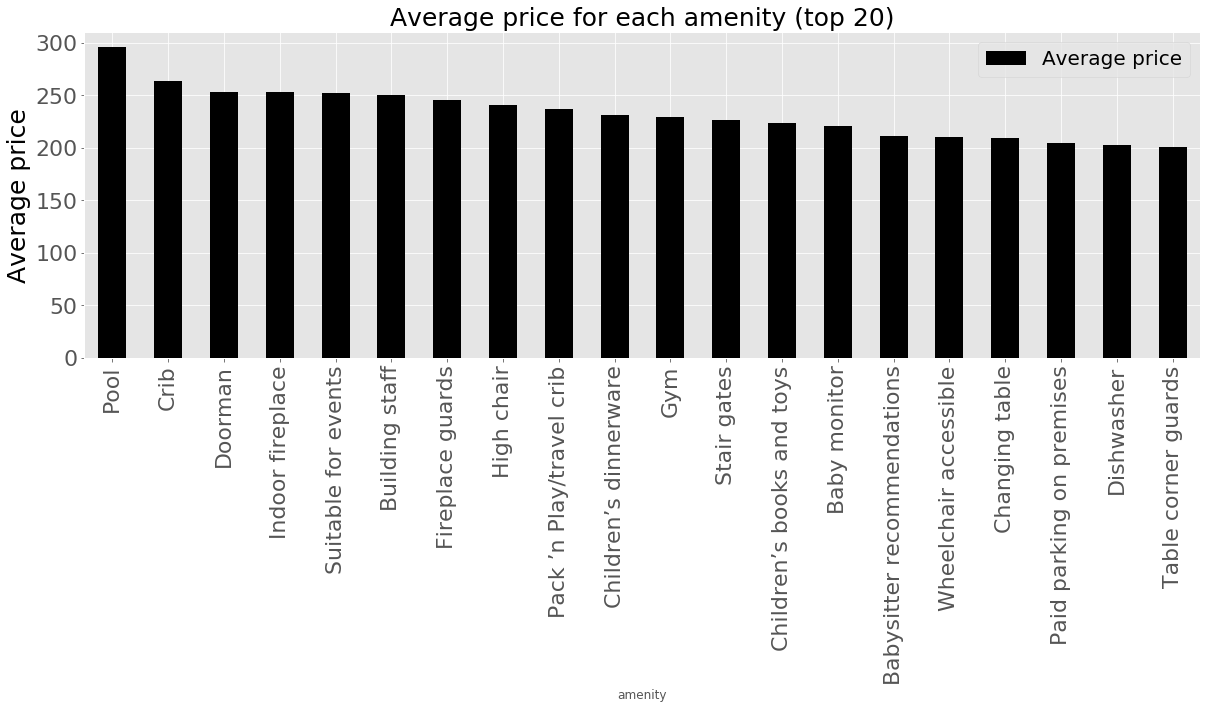

In [65]:
def average_price_amenity(df,unique_amenities):
    amenity_prices = [
        (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].mean()) 
        for amn in unique_amenities
    ]
    amenity_vs_price = pd.Series(data=[a[1] for a in amenity_prices], 
                                 index=[a[0] for a in amenity_prices])
    amenity_vs_price = amenity_vs_price.to_frame().reset_index()
    amenity_vs_price = amenity_vs_price.rename(
        columns= {0: 'Average price','index': 'amenity'})
    d2 = amenity_vs_price.nlargest(columns='Average price', n = 20)
    d2.head()
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    d2.plot(x='amenity',y='Average price',kind='bar',color='black')
    plt.ylabel('Average price',fontsize=25,color='black')
    plt.title('Average price for each amenity (top 20)',fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()
average_price_amenity(data, unique_amenities)

Now lets take a look at the median

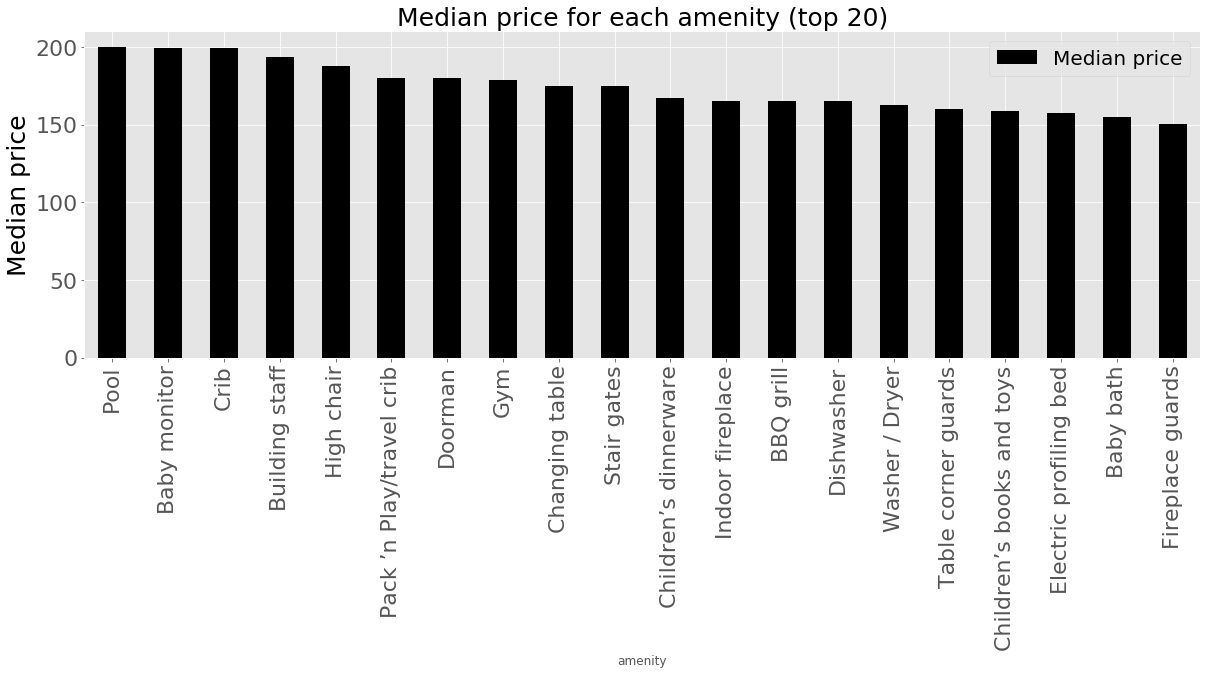

In [66]:
def median_price_amenity(df,unique_amenities):
    amenity_prices = [
        (amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].median()) 
        for amn in unique_amenities
    ]
    amenity_vs_price = pd.Series(data=[a[1] for a in amenity_prices], 
                                 index=[a[0] for a in amenity_prices])
    amenity_vs_price = amenity_vs_price.to_frame().reset_index()
    amenity_vs_price = amenity_vs_price.rename(
        columns= {0: 'Median price','index': 'amenity'})
    d2 = amenity_vs_price.nlargest(columns='Median price', n = 20)
    d2.head()
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize']=(20,6)
    plt.style.use(style='ggplot')
    d2.plot(x='amenity',y='Median price',kind='bar',color='black')
    plt.ylabel('Median price',fontsize=25,color='black')
    plt.title('Median price for each amenity (top 20)',fontsize=25,color='black')
    plt.tick_params(labelsize=22)
    plt.xticks(rotation='vertical')
    plt.show()
median_price_amenity(data, unique_amenities)

## Analizing correlation between features

In [67]:
correlation = data.corr()

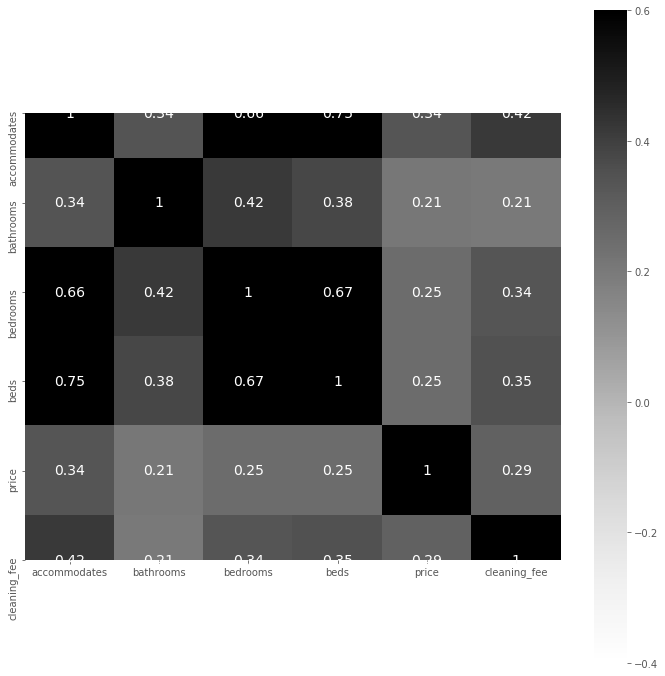

In [68]:
correlation_f = correlation.index[abs(correlation["price"])>0.2]
plt.figure(figsize=(12,12))
sns.heatmap(data[correlation_f].corr(), annot = True, cmap = "Greys", 
                cbar = True, vmin = -0.4, vmax = 0.6, square=True, annot_kws={"size": 14})

## Feature Engineering (NOT DONE YET, ONLY FUNCTIONS)

## Engineering the amenities features 

There are numerous amenities per listing (a listing easy has 20 to 40 amenities). Using the frequency distribution for the amenities, we decided to assign each amenity a weight based on it's frequency across all the listings considered: $$w(i) = \frac{f(i)}{f_{max}},$$

where $f(i)$ is the frequency of amenity $i$ and $f_{max}={\rm max}\{f(i):\, i\in {\rm amenities}\}$ is the maximum frequency ($f_{max}$ is due to the WiFi amenity). In essence, the  more frequent an specific amenity, the greater its weight (the maximum value of $w(i)$ is is 1; the minimum value is 0). For example, WiFi, Essentials and TV are the 3 most frequently listed amenities and accordingly, the possess weights of 1, 0.957 and 0.948 respectively.

For a listing containing $N$ amenities, we decided to replace the set of amenities by the sum $s$ of the weights of the amenities: $$s=\sum_{i=1}^{N}w(i).$$

In [69]:
def apply_weights_to_listings(x,w):
    x = list(x.split(','))
    s=sum([w['Count'][w['Amenity'][w['Amenity']==i].index.tolist()[0]] for i in x])
    return s

def engineer_amenities(df,amenities_freq_dist):
    w = amenities_freq_dist.copy()
    w['Count'] = w['Count']/w['Count'].max()
    df['amenities']=df['amenities'].apply(apply_weights_to_listings,args=[w])
    return df

In [70]:
# data = engineer_amenities(data,amenities_freq_dist_train)

# Machine Learning

## Step 1. Split data into a training set and a a test set

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# As a first test, we will use the most correlated attribute 
attributes = ['accommodates']
X = data[attributes]
y = data.price
X_training, X_test, y_training, y_test = train_test_split(
    X, y, random_state=0)

rf = RandomForestRegressor()
rf.fit(X_training, y_training)

/home/ignisgravitas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [80]:
rf.score(X_test, y_test)

0.11289165728135263

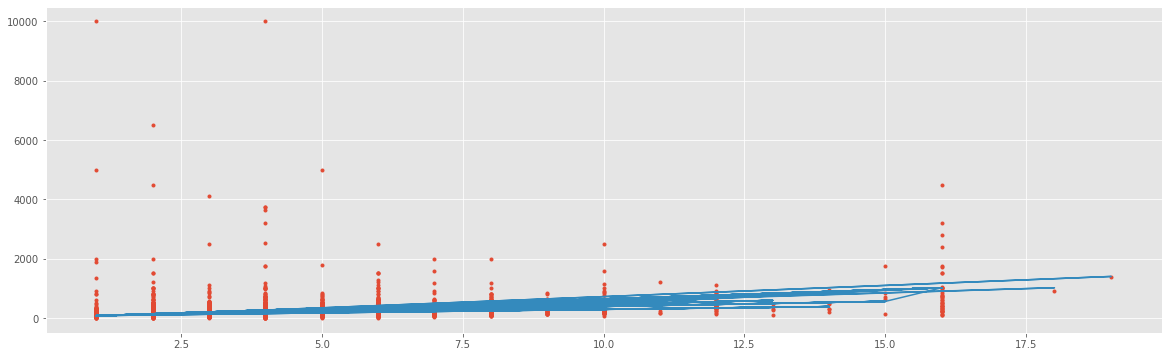

In [81]:
plt.plot(X_test,y_test,'.', X_test,rf.predict(X_test),'-')